# Lasso Regression

In [2]:
#importing Libraries.
import pandas as pd #for data manupulation or analysis
import numpy as np # for mumeric calculation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoLarsCV
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
#import the dataframe as dataset.
data=pd.read_csv('tree_addhealth.csv')
data

,BIO_SEX,HISPANIC,WHITE,BLACK,NAMERICAN,ASIAN,age,TREG1,ALCEVR1,ALCPROBS1,...,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
0,2.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,1.0,2,...,47.0,4.0,0,5.0,NaN,NaN,0.0,24.3,8.0,15.0
1,2.0,0.0,0.0,1.0,0.0,0.0,19.427397,1.0,1.0,1,...,35.0,1.0,0,5.0,22.0,2.333333,0.0,23.3,9.0,15.0
2,1.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0,...,45.0,0.0,0,1.0,30.0,2.250000,0.0,24.3,3.0,15.0
3,1.0,0.0,0.0,1.0,0.0,0.0,20.430137,1.0,0.0,0,...,47.0,4.0,1,4.0,19.0,2.000000,0.0,18.7,6.0,14.0
4,2.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,1.0,0,...,39.0,0.0,0,5.0,32.0,3.000000,0.0,20.0,9.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6499,2.0,0.0,0.0,1.0,0.0,0.0,14.260274,0.0,0.0,0,...,38.0,2.0,0,2.0,27.0,3.500000,0.0,23.0,3.0,14.0
6500,1.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,0.0,0,...,35.0,0.0,1,0.0,32.0,3.000000,0.0,23.3,9.0,15.0
6501,1.0,0.0,1.0,0.0,0.0,0.0,15.093151,1.0,1.0,4,...,50.0,13.0,0,2.0,14.0,1.000000,0.0,23.7,9.0,13.0
6502,2.0,0.0,1.0,0.0,0.0,0.0,15.509589,0.0,0.0,0,...,29.0,1.0,1,6.0,26.0,3.000000,0.0,21.3,1.0,12.0


In [4]:
#Checking for null values.
data.isna().sum()

BIO_SEX         1
HISPANIC       23
WHITE          19
BLACK          19
NAMERICAN      19
ASIAN          19
age          1667
TREG1           4
ALCEVR1        60
ALCPROBS1       0
marever1        0
cocever1        0
inhever1        0
cigavail       60
DEP1           18
ESTEEM1        21
VIOL1          50
PASSIST         0
DEVIANT1       56
SCHCONN1      136
GPA1          230
EXPEL1         18
FAMCONCT        0
PARACTV        27
PARPRES       135
dtype: int64

In [5]:
data.dtypes

BIO_SEX      float64
HISPANIC     float64
WHITE        float64
BLACK        float64
NAMERICAN    float64
ASIAN        float64
age          float64
TREG1        float64
ALCEVR1      float64
ALCPROBS1      int64
marever1       int64
cocever1       int64
inhever1       int64
cigavail     float64
DEP1         float64
ESTEEM1      float64
VIOL1        float64
PASSIST        int64
DEVIANT1     float64
SCHCONN1     float64
GPA1         float64
EXPEL1       float64
FAMCONCT     float64
PARACTV      float64
PARPRES      float64
dtype: object

In [6]:
data.columns=map(str.upper,data.columns)

In [7]:
data_clearn=data.dropna()
recodel={1:1,2:0}
data_clearn['MALE']=data_clearn['BIO_SEX'].map(recodel)

In [8]:
pred=data_clearn[['MALE','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN','AGE','TREG1','ALCEVR1','ALCPROBS1','MAREVER1','COCEVER1','INHEVER1','CIGAVAIL','DEP1','ESTEEM1','VIOL1','PASSIST','DEVIANT1','SCHCONN1','GPA1','EXPEL1','FAMCONCT','PARACTV','PARPRES']]

# Data visualization

<AxesSubplot:>

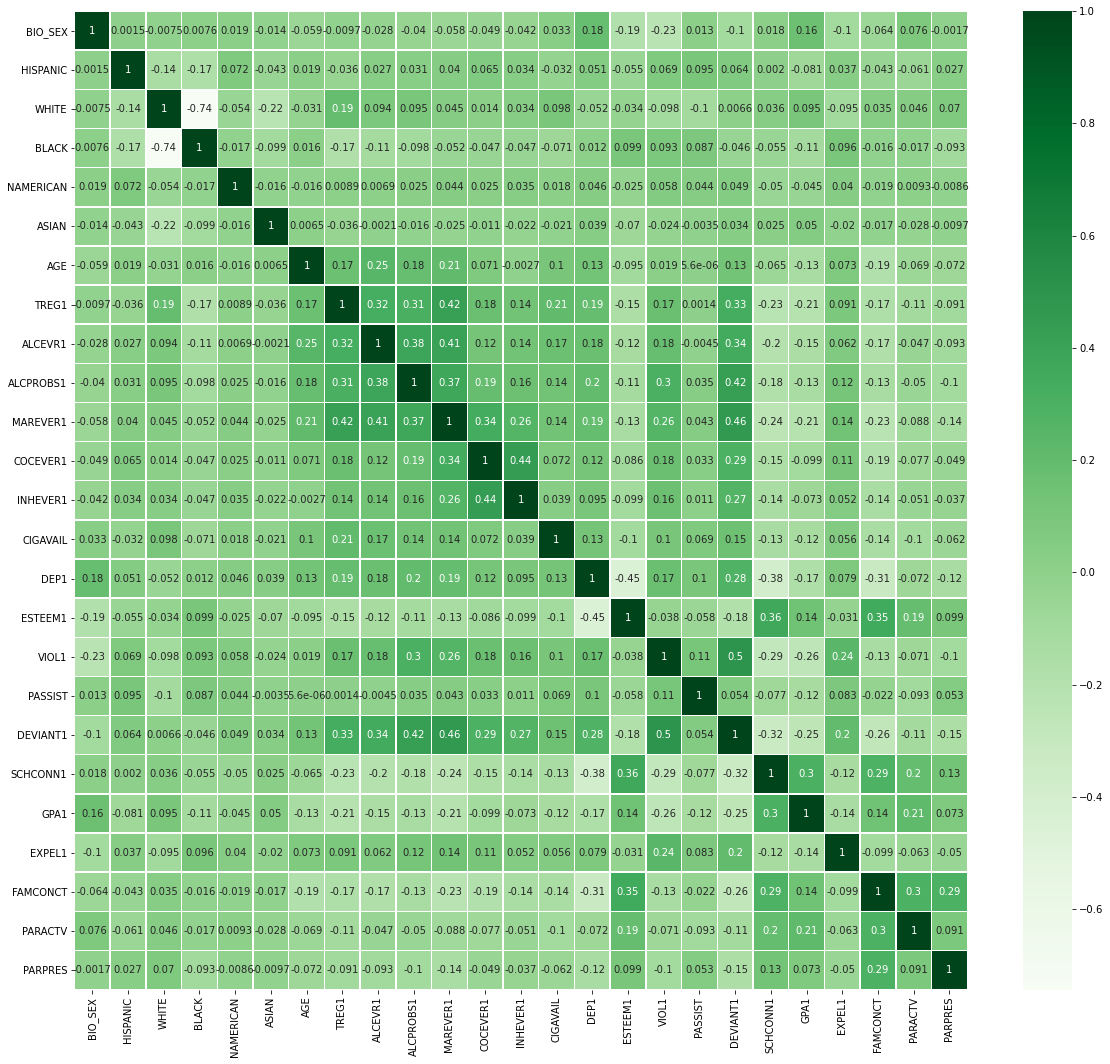

In [9]:
#Visualization of data 
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(), annot=True,linewidths=.5, cmap="Greens")

In [10]:
target=data_clearn.SCHCONN1

In [11]:
predictors=pred.copy()
from sklearn import preprocessing
predictors['MALE'] = preprocessing.scale(predictors['MALE'].astype('float64'))
predictors['HISPANIC'] = preprocessing.scale(predictors['HISPANIC'].astype('float64'))
predictors['WHITE'] = preprocessing.scale(predictors['WHITE'].astype('float64'))
predictors['BLACK'] = preprocessing.scale(predictors['BLACK'].astype('float64'))
predictors['NAMERICAN'] = preprocessing.scale(predictors['NAMERICAN'].astype('float64'))
predictors['ASIAN'] = preprocessing.scale(predictors['ASIAN'].astype('float64'))
predictors['AGE'] = preprocessing.scale(predictors['AGE'].astype('float64'))
predictors['TREG1'] = preprocessing.scale(predictors['TREG1'].astype('float64'))
predictors['ALCEVR1'] = preprocessing.scale(predictors['ALCEVR1'].astype('float64'))
predictors['ALCPROBS1'] = preprocessing.scale(predictors['ALCPROBS1'].astype('float64'))
predictors['MAREVER1'] = preprocessing.scale(predictors['MAREVER1'].astype('float64'))
predictors['COCEVER1'] = preprocessing.scale(predictors['COCEVER1'].astype('float64'))
predictors['CIGAVAIL'] = preprocessing.scale(predictors['CIGAVAIL'].astype('float64'))
predictors['DEP1'] = preprocessing.scale(predictors['DEP1'].astype('float64'))
predictors['ESTEEM1'] = preprocessing.scale(predictors['ESTEEM1'].astype('float64'))
predictors['VIOL1'] = preprocessing.scale(predictors['VIOL1'].astype('float64'))
predictors['PASSIST'] = preprocessing.scale(predictors['PASSIST'].astype('float64'))
predictors['DEVIANT1'] = preprocessing.scale(predictors['DEVIANT1'].astype('float64'))
predictors['SCHCONN1'] = preprocessing.scale(predictors['SCHCONN1'].astype('float64'))
predictors['GPA1'] = preprocessing.scale(predictors['GPA1'].astype('float64'))
predictors['FAMCONCT'] = preprocessing.scale(predictors['FAMCONCT'].astype('float64'))
predictors['PARACTV'] = preprocessing.scale(predictors['PARACTV'].astype('float64'))
predictors['PARPRES'] = preprocessing.scale(predictors['PARPRES'].astype('float64'))


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6504 entries, 0 to 6503
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BIO_SEX    6503 non-null   float64
 1   HISPANIC   6481 non-null   float64
 2   WHITE      6485 non-null   float64
 3   BLACK      6485 non-null   float64
 4   NAMERICAN  6485 non-null   float64
 5   ASIAN      6485 non-null   float64
 6   AGE        4837 non-null   float64
 7   TREG1      6500 non-null   float64
 8   ALCEVR1    6444 non-null   float64
 9   ALCPROBS1  6504 non-null   int64  
 10  MAREVER1   6504 non-null   int64  
 11  COCEVER1   6504 non-null   int64  
 12  INHEVER1   6504 non-null   int64  
 13  CIGAVAIL   6444 non-null   float64
 14  DEP1       6486 non-null   float64
 15  ESTEEM1    6483 non-null   float64
 16  VIOL1      6454 non-null   float64
 17  PASSIST    6504 non-null   int64  
 18  DEVIANT1   6448 non-null   float64
 19  SCHCONN1   6368 non-null   float64
 20  GPA1    

In [13]:
#splitting the data first into two part -- doing a 80:20 split i.e 80% for train set and 20% for test set
from sklearn.model_selection import train_test_split
pre_train, pre_test, tar_train, tar_test= train_test_split(predictors,target, test_size=0.3, random_state=123)

In [15]:
#the Lasso regression model define
model=LassoLarsCV(cv=10,precompute=False).fit(pre_train,tar_train)


model.fit( pre_train, tar_train )

tar_pred = model.predict( pre_test )
print(tar_pred)




[29. 26. 22. ... 30. 24. 21.]


In [16]:
from sklearn.metrics import mean_squared_error
train_error= mean_squared_error(tar_train,model.predict(pre_train))
test_error= mean_squared_error(tar_test,model.predict(pre_test))
print(train_error)
print(test_error)

4.308333530962825e-28
3.95184265798889e-28
